# 1. Analyzing MBTI Distribution Across Different Brands

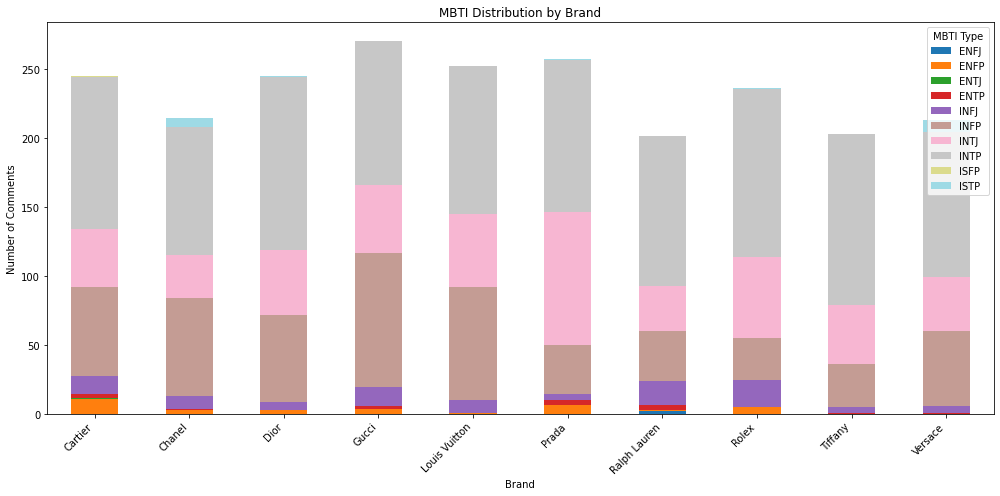

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/final_dataset_with_mbti_predictions.csv')
#group by brand and MBTI type, and calculate the count for each combination
brand_mbti_distribution = data.groupby(['brand', 'MBTI']).size().unstack()
#fill any missing values with 0
brand_mbti_distribution = brand_mbti_distribution.fillna(0)

#plot the MBTI distribution bar chart for each brand
brand_mbti_distribution.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('MBTI Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='MBTI Type')
plt.tight_layout()
plt.show()

# 2. Social Network Analysis

Social network analysis helps to understand user relationships and interactions. I used the NetworkX library to create a basic social network graph and generate interactive visualizations with Pyvis, enabling a deeper exploration of network connections. For reference, I followed the [Pyvis tutorial](https://pyvis.readthedocs.io/en/latest/tutorial.html).

In [17]:
import pandas as pd
from pyvis.network import Network
import networkx as nx

#load the dataset
data_path = 'data/final_dataset_with_mbti_predictions.csv'
data = pd.read_csv(data_path)

#build the NetworkX graph object
G = nx.Graph()

#iterate over each row in the dataset, adding brand and MBTI type as nodes, and creating edges
for _, row in data.iterrows():
    brand = row['brand']
    mbti = row['MBTI']

    #add MBTI type and brand nodes
    G.add_node(mbti, title=mbti)
    G.add_node(brand, title=brand)
    #create edge between MBTI type and brand
    G.add_edge(mbti, brand)

#use pyvis to create a dynamic network
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
#load data from the NetworkX graph
net.from_nx(G)
#set different colors for MBTI types and black for brands, and adjust the size
mbti_colors = {'INTP': '#636EFA',  'INTJ': '#EF553B',  'INFP': '#00CC96', 'INFJ': '#AB63FA', 'ENFP': '#FFA15A',  'ISTP': '#19D3F3',  'ENTP': '#FF6692',  'ISFP': '#B6E880',  'ENTJ': '#FF97FF',  'ISFJ': '#FECB52'   }

for node in net.nodes:
    if node['id'] in mbti_colors:
        node['color'] = mbti_colors[node['id']]
        # MBTI nodes have a standard size
        node['size'] = 20  
    else:
        #brand nodes are black
        node['color'] = 'gray'
        #reduce size for brand nodes 
        node['size'] = 2  

#generate the HTML file,ref:https://python-textbook.pythonhumanities.com/06_sna/06_01_08_applied2.html
net.write_html('mbti_brand_network.html')

# 2. Sentiment Analysis

Sentiment analysis is used to determine the emotional tone of text, categorizing it as positive, negative, or neutral. By leveraging the TextBlob library, we can perform a straightforward sentiment analysis on text data. The results can be visualized using interactive histograms in Plotly, and more detailed comparisons can be made across different MBTI types using Seaborn and Matplotlib.

For further details, refer to the [Plotly Histogram Documentation](https://plotly.com/python/histograms/) and the [TextBlob Documentation](https://textblob.readthedocs.io/en/dev/).


In [11]:
import pandas as pd
import plotly.express as px
from textblob import TextBlob

#ensure all text data is a string, and replace NaN values with empty strings
data['cleaned_text'] = data['cleaned_text'].fillna('').astype(str)
#perform sentiment analysis using TextBlob
data['sentiment'] = data['cleaned_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

#create an interactive histogram using Plotly
fig = px.histogram(data, x='sentiment', nbins=50, title='Sentiment Distribution',labels={'sentiment': 'Sentiment Polarity'},color_discrete_sequence=['blue'])

#update layout for better visualization
fig.update_layout(xaxis_title='Sentiment Polarity',yaxis_title='Number of Comments',bargap=0.1,)
fig.show()

<ipython-input-13-ec6ac680c4c2>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




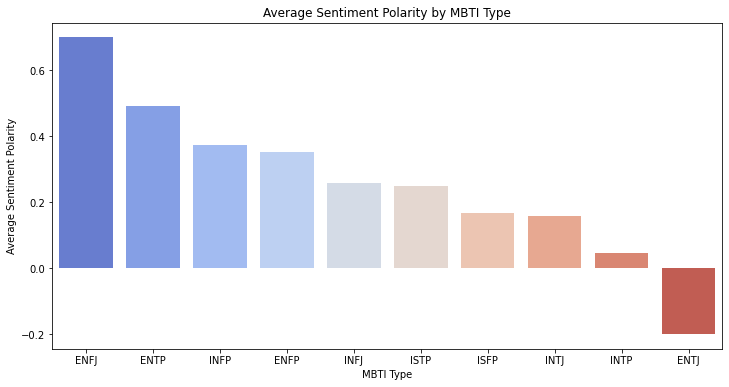

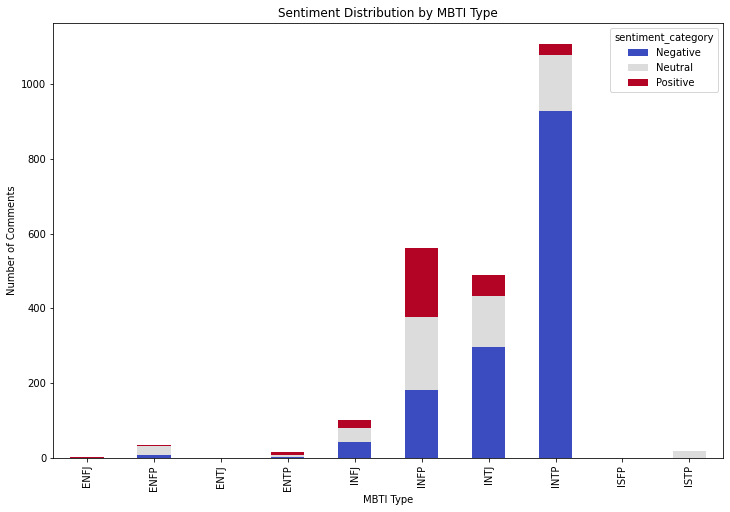

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#calculate the average sentiment polarity for each MBTI type
mbti_sentiment = data.groupby('MBTI')['sentiment'].mean().sort_values(ascending=False).reset_index()

#plot a bar chart showing the average sentiment polarity by MBTI type
plt.figure(figsize=(12, 6))
sns.barplot(x='MBTI', y='sentiment', data=mbti_sentiment, palette='coolwarm')
plt.title('Average Sentiment Polarity by MBTI Type')
plt.xlabel('MBTI Type')
plt.ylabel('Average Sentiment Polarity')
plt.show()

#categorize sentiment polarity into three classes: Negative (<0), Neutral (=0), Positive (>0),ref:https://machinelearningtutorials.org/pandas-cut-function-binning-and-grouping-data-with-examples/
data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, 0, 0.5, 1], labels=['Negative', 'Neutral', 'Positive'])

#create a crosstab and plot a stacked bar chart to show sentiment distribution by MBTI type,ref:https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(data['MBTI'], data['sentiment_category']).plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Sentiment Distribution by MBTI Type')
plt.xlabel('MBTI Type')
plt.ylabel('Number of Comments')
plt.show()

### Add sentiment analysis into the network

In [18]:
import pandas as pd
from pyvis.network import Network
import networkx as nx
from textblob import TextBlob

#load the dataset
data_path = 'data/final_dataset_with_mbti_predictions.csv'
data = pd.read_csv(data_path)
#ensure all text data is strings and replace NaN values with empty strings
data['cleaned_text'] = data['cleaned_text'].fillna('').astype(str)

#perform sentiment analysis using TextBlob
data['sentiment'] = data['cleaned_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

#pefine sentiment categories
def sentiment_category(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(sentiment_category)

#build a NetworkX graph object
G = nx.Graph()

#iterate over each row in the dataset, add brand and MBTI types as nodes, and create connections
for _, row in data.iterrows():
    brand = row['brand']
    mbti = row['MBTI']
    sentiment = row['sentiment_category']

    #add MBTI type and brand nodes
    G.add_node(mbti, title=f"{mbti} ({sentiment})")
    G.add_node(brand, title=brand)
    #connect MBTI type and brand
    G.add_edge(mbti, brand)

#build a dynamic network using pyvis
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
#load data from the NetworkX graph object
net.from_nx(G)
#set different colors for MBTI type nodes
mbti_colors = {'INTP': '#636EFA', 'INTJ': '#EF553B',  'INFP': '#00CC96',  'INFJ': '#AB63FA',  'ENFP': '#FFA15A',  'ISTP': '#19D3F3',  'ENTP': '#FF6692',  'ISFP': '#B6E880',  'ENTJ': '#FF97FF',  'ISFJ': '#FECB52'  }

for node in net.nodes:
    if node['id'] in mbti_colors:
        node['color'] = mbti_colors[node['id']]
        #set the size of the node based on the sentiment category
        node['size'] = data[data['MBTI'] == node['id']]['sentiment'].mean() * 50 + 20

#set brand nodes to gray and reduce size
for node in net.nodes:
    if node['id'] not in mbti_colors:
        node['color'] = 'grey'  # Gray
        node['shape'] = 'dot'
        node['size'] = 2  # Smaller size

#use the write_html method to generate an HTML file
net.write_html('mbti_brand_sentiment_network.html')

# 3. LDA Topic Analysis

LDA (Latent Dirichlet Allocation) identifies key topics associated with different MBTI types based on user comments, offering insights into the dominant themes for each personality profile.

**References:**
- [Latent Dirichlet Allocation](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)
- [LDA in Python Tutorial](https://towardsdatascience.com/lda-in-python-a-hands-on-introduction-1e7b17e7a3db)


Topic 0: prada aespa_official karina outfit_luxy thewatchb ambassador global karinaxprada want katarinakive
Topic 1: gucci versace dior ningning billkin_ent tawattannn love cartier versacefw24 ellementhailand
Topic 2: pradaxbby chanel louis vuitton newjeans_ador louisvuitton felix rolex f1 beautiful
Topic 3: versace gulfkanawut dior gucci ralphlauren jisoo f4shionall usopen blue pretty
Topic 4: tiffanyandco nbcolympics teamusa paralympics paris2024 best zhan need xiao pair


<ipython-input-20-d5eb5378c894>:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




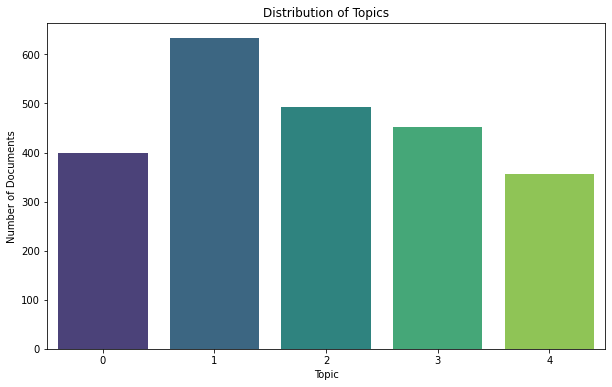

In [20]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

#load and preprocess the dataset
data = pd.read_csv('data/final_dataset_with_mbti_predictions.csv')
data = data.dropna(subset=['cleaned_text'])

#convert text data to vectors
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['cleaned_text'])

#set the number of LDA topics
n_topics = 5

#perform LDA topic modeling
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

#extract keywords for each topic
def display_topics(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[topic_idx] = top_words
    return topics

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, tf_feature_names, n_top_words)

#display the keywords for each topic
for topic, keywords in topics.items():
    print(f"Topic {topic}: {' '.join(keywords)}")

#assign the most relevant topic to each document
data['topic'] = lda.transform(X).argmax(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='topic', palette='viridis')
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.show()